Input Data - [1. 1. 1.] 		 Weights- [0.62885549 2.33492802 0.17076149] 	 Output- 0.958295414079251
Input Data - [1.5 1.5 1.2] 		 Weights- [0.62885549 2.33492802 0.17076149] 	 Output- 0.9905344809086812
Input Data - [1.7 2.1 0.9] 		 Weights- [0.62885549 2.33492802 0.17076149] 	 Output- 0.9978196529942774
Input Data - [1.4 1.8 1.1] 		 Weights- [0.62885549 2.33492802 0.17076149] 	 Output- 0.9948883372128541
Input Data - [-2. -2.  5.] 		 Weights- [0.62885549 2.33492802 0.17076149] 	 Output- 0.006219915913233432
Input Data - [-2.1 -1.7  5.5] 		 Weights- [0.62885549 2.33492802 0.17076149] 	 Output- 0.0127324660228656
Input Data - [-2.5 -2.5  6. ] 		 Weights- [0.62885549 2.33492802 0.17076149] 	 Output- 0.0016840136710859393
Input Data - [-1.7 -1.9  5.8] 		 Weights- [0.62885549 2.33492802 0.17076149] 	 Output- 0.010825129355582075
Expected Output-
[1 1 1 1 0 0 0 0]


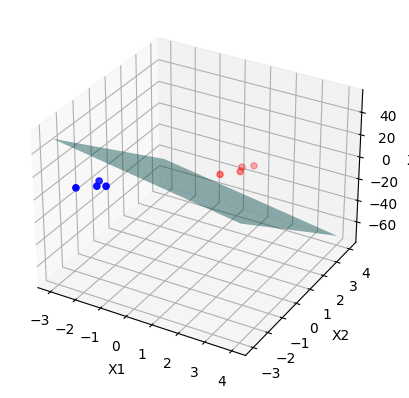

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Input and target data
X = np.array([[1, 1, 1],
              [1.5, 1.5, 1.2],
              [1.7, 2.1, 0.9],
              [1.4, 1.8, 1.1],
              [-2, -2, 5],
              [-2.1, -1.7, 5.5],
              [-2.5, -2.5, 6],
              [-1.7, -1.9, 5.8]])

t_outputs = np.array([1, 1, 1, 1, 0, 0, 0, 0])

# Sigmoid activation function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Initializing weights randomly from 3 to -3
weights = np.random.uniform(-3.0, 3.0, size=3)

# Learning rate
learning_rate = 0.5

# Training
for epoch in range(100):
    for i in range(len(X)):
        input_data = X[i]
        target = t_outputs[i]
        weighted_sum = np.dot(weights, input_data)
        output = sigmoid(weighted_sum)
        error = target - output
        weights += learning_rate * error * output * (1 - output) * input_data

# Printing the input, weights, and output after training

for i in range(len(X)):
    input_data = X[i]
    weighted_sum = np.dot(weights, input_data)
    output = sigmoid(weighted_sum)
    print("Input Data -",input_data,"\t\t","Weights-", weights,"\t","Output-" ,output)
print("Expected Output-")
print(t_outputs)

# Plot the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Scatter plot of the input data
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t_outputs, cmap='bwr')

# Plot the decision boundary
x1 = np.linspace(-3, 4, num=100)
x2 = np.linspace(-3, 4, num=100)
x1, x2 = np.meshgrid(x1, x2)
x3 = -(weights[0] * x1 + weights[1] * x2 + weights[2]) / weights[2]
ax.plot_surface(x1, x2, x3, alpha=0.5,color='c')

plt.show()

In [11]:
import numpy as np

# Define the input data and expected output values
X = np.array([[1, 1, 1],
              [-1, 1, 1],
              [-1, 1, -1],
              [-1, -1, -1],
              [1, 0, 0],
              [-1, 0, 0],
              [0, 1, 0],
              [0, -1, 0],
              [0, 0, 1],
              [0, 0, -1]])

Y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Define the sigmoid activation function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Initialize the weights with random values
W1 = np.random.uniform(-1.0, 1.0, size=(3, 1))
W2 = np.random.uniform(-1.0, 1.0, size=(1, 3))
W3 = np.random.uniform(-1.0, 1.0, size=(3, 1))

# Define the learning rate and maximum iterations
learning_rate = 0.5
max_iterations = 100

# Training the neural network
for _ in range(max_iterations):
    # Forward propagation
    layer1_output = sigmoid(np.dot(X, W1))
    layer2_output = sigmoid(np.dot(layer1_output, W2))
    layer3_output = sigmoid(np.dot(layer2_output, W3))
    
    # Backpropagation
    layer3_error = Y.reshape(-1, 1) - layer3_output
    layer3_delta = learning_rate * layer3_error * layer3_output * (1 - layer3_output)
    layer2_error = np.dot(layer3_delta, W3.T)
    layer2_delta = learning_rate * layer2_error * layer2_output * (1 - layer2_output)
    layer1_error = np.dot(layer2_delta, W2.T)
    layer1_delta = learning_rate * layer1_error * layer1_output * (1 - layer1_output)
    
    # Update weights
    W3 += np.dot(layer2_output.T, layer3_delta)
    W2 += np.dot(layer1_output.T, layer2_delta)
    W1 += np.dot(X.T, layer1_delta)
    
# Print the input, weights, and output values after training
print("Input:")
print(X)
print("Expected Outputs")
print(Y)
print("\nWeights (Layer 1):")
print(W1)
print("\nWeights (Layer 2):")
print(W2)
print("\nWeights (Layer 3):")
print(W3)
print("\nOutput:")
print(layer3_output.flatten())


#the first code was just a single layer as comapraed to the current which is a multiple layers and also we are using back propogation to update the weights
#in the second one the complexity of the second code is much greater comapared to first one elaborating the second one it has 3 input layer 3 nodes at output layer
#and has one hidden layer network is trained using forward and backward propogation.


Input:
[[ 1  1  1]
 [-1  1  1]
 [-1  1 -1]
 [-1 -1 -1]
 [ 1  0  0]
 [-1  0  0]
 [ 0  1  0]
 [ 0 -1  0]
 [ 0  0  1]
 [ 0  0 -1]]
Expected Outputs
[0 0 0 0 1 1 1 1 1 1]

Weights (Layer 1):
[[ 0.17833119]
 [-0.63421112]
 [-0.87057122]]

Weights (Layer 2):
[[-0.70360918  0.62660614  0.48363364]]

Weights (Layer 3):
[[-0.94225847]
 [ 0.55981071]
 [ 0.87332372]]

Output:
[0.57958322 0.57503677 0.60559361 0.62778485 0.60791262 0.60060758
 0.59139094 0.61682766 0.58693655 0.62102074]
